In [25]:
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
def get_dataset(opt):
    
    DIR ="/home/lucas/Desktop/poli/PSI3472/rede_colorir_rede/dados/"+opt+"/"
    
    X = []
    Y = []
    
    imagens_treino = [f for f in listdir(DIR) if isfile(join(DIR, f))]
        
    i=1
    
    for imagem in imagens_treino:
        
        if i % 2 == 1:
            
            # Armazenar imagem colorida (Y)
            
            img = cv2.imread(DIR+imagem)
            
            img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
            
            Y.append(img)
            
        if i % 2 == 0:
            
            # Armazenar imagem preto e branca (X)
            
            img = cv2.imread(DIR+imagem, 0)
                        
            X.append(img)
            
        i=i+1
          
    X = np.array(X)
    Y = np.array(Y)
        
    return X, Y

In [27]:
def pre_process(X, Y):
    
    n = X.shape[0]
    n_linhas = X.shape[1]
    n_colunas = X.shape[2]
    
    X = np.float64(X)/255.0
    Y = np.float64(Y)/255.0
    
    # preto e branco
    X = X.reshape(n, n_linhas, n_colunas, 1)
    
    #colorido
    Y = Y.reshape(n, n_linhas, n_colunas, 3)
    
    input_shape = (n_linhas, n_colunas, 1)
    
    return X, Y, input_shape

In [35]:
def colorir_imagem(name):
    
    # Fornecer imagem preto e branco
    
    img = cv2.imread("dados/teste/"+name, 0)
    
    plt.figure(0)
    plt.title("Preto e branco")
    plt.imshow(img, cmap='gray')
    plt.show()
    
    nl=img.shape[0]
    nc=img.shape[1]
    
    img = img.reshape(1, nl, nc, 1)
    
    img = np.float64(img) / 255.0
    
    img_predicted = model.predict(img)
    
    img_predicted = np.uint8( img_predicted * 255.0 )
            
    img_predicted = img_predicted.reshape(nl, nc, 3)

    img_predicted = cv2.cvtColor(img_predicted, cv2.COLOR_LAB2RGB)
    
    plt.title("Colorida pela Rede Neural")
    
    plt.imshow(img_predicted)
    plt.show()

In [36]:
X_teste, Y_teste = get_dataset("teste")

In [37]:
X_teste, Y_teste, input_shape = pre_process(X_teste, Y_teste)

In [38]:
from keras.models import load_model

In [39]:
model = load_model("psi3472.h5")

In [40]:
score = model.evaluate(X_teste, Y_teste, verbose=0)
print('Test loss:', score)

Test loss: [0.013556893914937973, 0.013556894846260548]


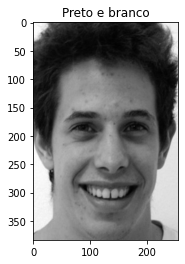

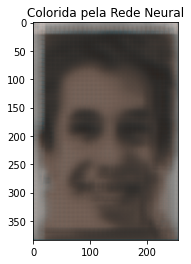

(384, 256, 3)


In [41]:
colorir_imagem("165bl.jpg")